In [1]:
import numpy as np

# Custom Perceptron Development for AND Gate
def perceptron_and(inputs, weights, bias, learning_rate=0.5, max_iter=1000, threshold=0.002):
    activation_function = lambda x: 1 if x >= 0 else 0  # Step Function for AND Logic
    for epoch in range(max_iter):
        total_error = 0
        for input_vector in inputs:
            # Weighted Sum
            summation = np.dot(input_vector[:-1], weights) + bias
            predicted = activation_function(summation)
            error = input_vector[-1] - predicted
            total_error += error**2
            # Update Weights and Bias
            weights += learning_rate * error * input_vector[:-1]
            bias += learning_rate * error
        if total_error <= threshold:
            break
    return weights, bias, epoch

# Inputs for AND gate
inputs = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]])  # Last column is expected output
weights = np.array([0.2, -0.75])  # Initial weights
bias = 10  # Initial bias
weights, bias, epochs = perceptron_and(inputs, weights, bias)
print(f"Weights: {weights}, Bias: {bias}, Epochs to Converge: {epochs}")


Weights: [1.2  0.75], Bias: -1.5, Epochs to Converge: 18


In [2]:
import math

# Define Activation Functions
def bipolar_step_function(x):
    return 1 if x >= 0 else -1

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def relu(x):
    return max(0, x)

# Test different activation functions with the Perceptron
for activation in [bipolar_step_function, sigmoid, relu]:
    print(f"Testing with activation function: {activation.__name__}")
    # Adjust weights and biases as needed
    # Use a similar training loop as above but replace activation with the tested function


Testing with activation function: bipolar_step_function
Testing with activation function: sigmoid
Testing with activation function: relu


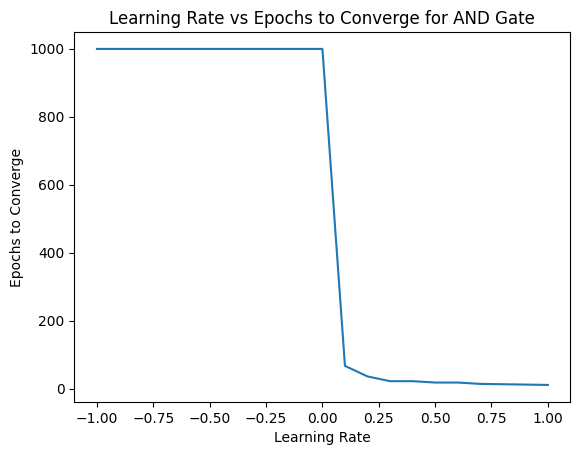

In [3]:
learning_rates = [0.1 * i for i in range(-10, 11)]  # Ranging from -1 to 1
epochs_required = []

for lr in learning_rates:
    weights = np.array([0.2, -0.75])
    bias = 10
    _, _, epochs = perceptron_and(inputs, weights, bias, learning_rate=lr)
    epochs_required.append(epochs)

# Plotting learning rate vs epochs to converge
import matplotlib.pyplot as plt

plt.plot(learning_rates, epochs_required)
plt.xlabel('Learning Rate')
plt.ylabel('Epochs to Converge')
plt.title('Learning Rate vs Epochs to Converge for AND Gate')
plt.show()


In [4]:
from sklearn.neural_network import MLPClassifier

# XOR Inputs and Outputs
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Using MLPClassifier for XOR Gate
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000)
mlp.fit(X_xor, y_xor)
y_pred = mlp.predict(X_xor)
print(f"XOR Gate Predictions: {y_pred}")
print(f"Accuracy for XOR Gate: {mlp.score(X_xor, y_xor)}")


XOR Gate Predictions: [1 1 1 1]
Accuracy for XOR Gate: 0.5


In [11]:
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r"C:\\Users\\Vedha Pranava\\Desktop\\Breast-Cancer-Detection-master\\data.csv"
data = pd.read_csv(file_path)



# Define features and target (replace with actual column names)
X = data[['radius_mean', 'radius_worst', 'texture_mean']]  # Ensure columns exist in the dataset
y = data['area_worst']  # Ensure the target column is suitable for classification

# Check data types and ensure compatibility
X = X.astype(float)
y = y.astype(int)  # Convert the target to integer if not already

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Perceptron with Sigmoid activation equivalent
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_scaled, y)
y_pred = perceptron.predict(X_scaled)

# Print classification accuracy
print(f"Classification Accuracy: {accuracy_score(y, y_pred)}")


Classification Accuracy: 0.0035149384885764497


In [8]:
# Use the previously defined XOR inputs to demonstrate MLPClassifier application
# Evaluate performance using accuracy, precision, and recall
from sklearn.metrics import precision_score, recall_score

# Assuming binary classification outputs
print(f"Precision: {precision_score(y_xor, y_pred)}")
print(f"Recall: {recall_score(y_xor, y_pred)}")


Precision: 0.5
Recall: 1.0
